## Import Statement

In [114]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import seaborn as sns
from pathlib import Path
from IPython.display import display
import ipywidgets as widgets
import plotly.express as px


## Date range Calculation 

In [115]:
current_date = datetime.today()
end_date = datetime.today().strftime('%Y-%m-%d')
end_date_split = end_date.split("-")
end_date_year = end_date_split[0]
end_date_month = end_date_split[1]
end_date_day = end_date_split[2]
beg_date_year = int(end_date_year) -5 
beg_date = str(beg_date_year) + "-" + end_date_month + "-" + end_date_day



In [116]:
print(type(current_date))

<class 'datetime.datetime'>


## Creating Dataframe for Telecom Industry

In [117]:
# get the data
telecom_stock_df = pd.DataFrame()
telecom_stock_df["stock_name"] = ''
telecom_stock_df["sector"] = ''
telecom_stock_df["Date"] = ''
telecom_stock_df["Open"] = ''
telecom_stock_df["High"] = ''
telecom_stock_df["Low"] = ''
telecom_stock_df["Close"] = ''
telecom_stock_df["Adj Close"] = ''
telecom_stock_df["Volume"] = ''


stocks = ["DTEGY", "VOD", "GTMEF","TMUS", "T", "VZ"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Telecom"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)

telecom_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\2811328243.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telecom_stock_df = telecom_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,DTEGY,Telecom,2018-08-10,15.910000,15.950000,15.82,15.88,14.289305,105800
1,DTEGY,Telecom,2018-08-13,16.030001,16.070000,15.91,15.96,14.361290,78800
2,DTEGY,Telecom,2018-08-14,16.040001,16.049999,15.92,15.98,14.379288,103800
3,DTEGY,Telecom,2018-08-15,15.780000,15.800000,15.66,15.77,14.190324,147100
4,DTEGY,Telecom,2018-08-16,15.850000,15.960000,15.85,15.89,14.298304,142700


## Calculating Percentage Change 

In [118]:
telecom_stock_df["stock_price_change_percentage"] = ((telecom_stock_df["Close"] - telecom_stock_df["Open"])/telecom_stock_df["Open"]) * 100

telecom_stock_df.head()

,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume,stock_price_change_percentage
0,DTEGY,Telecom,2018-08-10,15.910000,15.950000,15.82,15.88,14.289305,105800,-0.188559
1,DTEGY,Telecom,2018-08-13,16.030001,16.070000,15.91,15.96,14.361290,78800,-0.436685
2,DTEGY,Telecom,2018-08-14,16.040001,16.049999,15.92,15.98,14.379288,103800,-0.374073
3,DTEGY,Telecom,2018-08-15,15.780000,15.800000,15.66,15.77,14.190324,147100,-0.063367
4,DTEGY,Telecom,2018-08-16,15.850000,15.960000,15.85,15.89,14.298304,142700,0.252366


## Line Plot for Telecom Industry

<IPython.core.display.Javascript object>


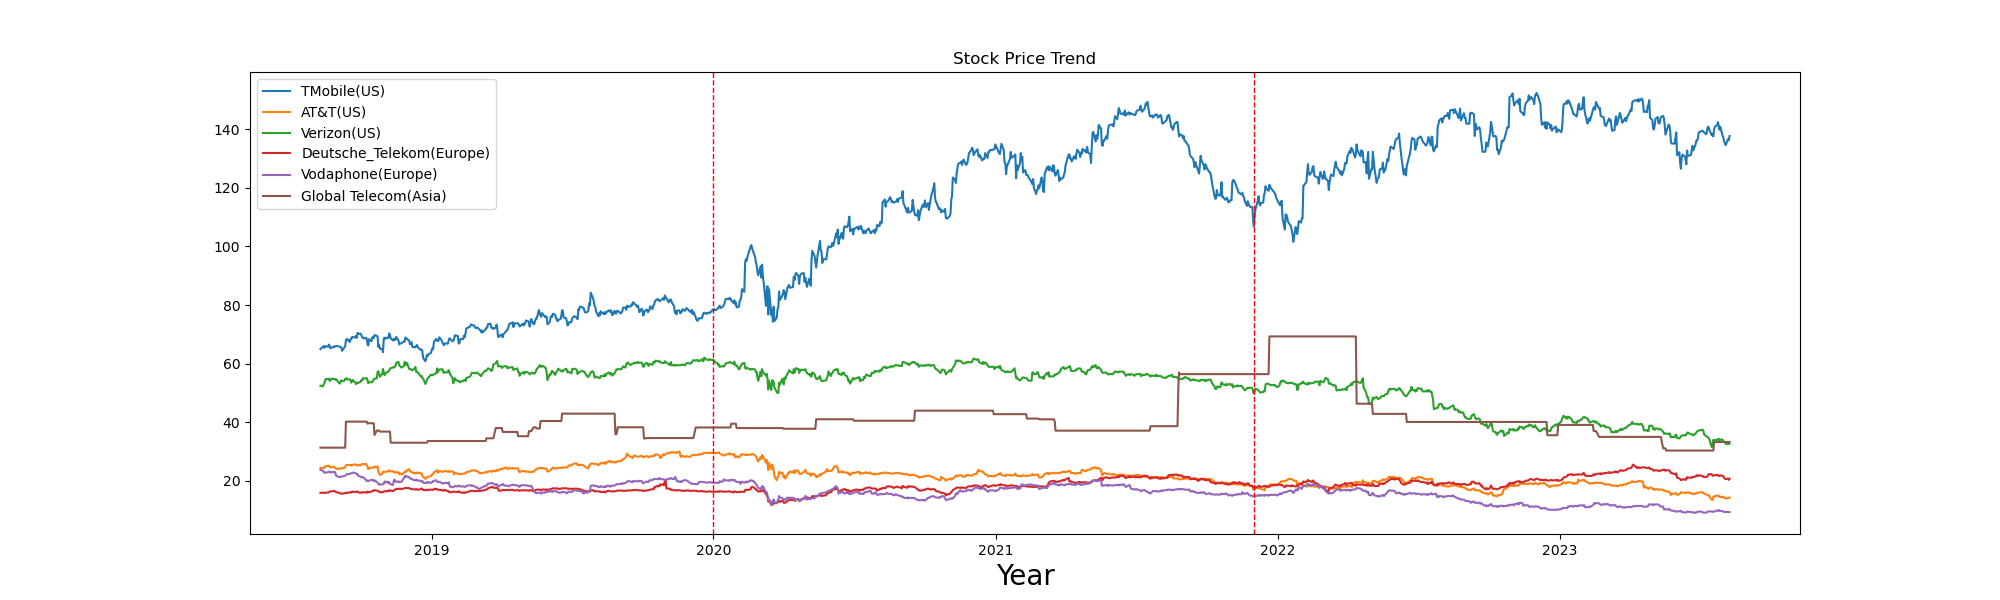

In [119]:
%matplotlib notebook
import datetime

TMobile_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "TMUS"]
ATT_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "T"]
Verizon_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "VZ"]
Deutsche_Telekom_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "DTEGY"]
Vodaphone_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "VOD"]
Global_Telecom_Stock = telecom_stock_df.loc[telecom_stock_df["stock_name"] == "GTMEF"]


plt_1 = plt.figure(figsize=(20, 6))
plt.plot(TMobile_Stock["Date"], TMobile_Stock["Close"], label = "TMobile(US)")
plt.plot(ATT_Stock["Date"], ATT_Stock["Close"], label = "AT&T(US)")
plt.plot(Verizon_Stock["Date"], Verizon_Stock["Close"], label = "Verizon(US)")
plt.plot(Deutsche_Telekom_Stock["Date"], Deutsche_Telekom_Stock["Close"], label = "Deutsche_Telekom(Europe)")
plt.plot(Vodaphone_Stock["Date"], Vodaphone_Stock["Close"], label = "Vodaphone(Europe)")
plt.plot(Global_Telecom_Stock["Date"], Global_Telecom_Stock["Close"], label = "Global Telecom(Asia)")
plt.axvline(datetime.datetime(2020, 1, 1), color='red', linewidth=1, linestyle='--')
plt.axvline(datetime.datetime(2021, 12, 1), color='red', linewidth=1, linestyle='--')
plt.xlabel("Year",fontsize=20)
plt.legend()
plt.title("Stock Price Trend")
plt.show()

## Analysis 

##### As per the above line graph to show stock Price change for different major Telecom Stocks across world. As per the line graph there is no major Stock price chnage for Covid in Telecom Industry. Only we saw pretty steep curve for TMobile Stock Price , but after further research on that , it is for TMobile and Sprint Merger which appened on Feb,2020.

## Select 2nd Jan ,2020 , 30th June ,2020, Dec 31,2020 , Dec31st 2021 , Current Date Data for Overall Analysis

In [123]:
telecom_stock_df.tail()

,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume,stock_price_change_percentage
7537,VZ,Telecom,2023-08-03,33.049999,33.250000,32.730000,33.060001,33.060001,20465700,0.030264
7538,VZ,Telecom,2023-08-04,33.000000,33.029999,32.529999,32.619999,32.619999,24558300,-1.151518
7539,VZ,Telecom,2023-08-07,32.650002,32.830002,32.180000,32.529999,32.529999,24314000,-0.367543
7540,VZ,Telecom,2023-08-08,32.450001,32.810001,32.430000,32.570000,32.570000,22178900,0.369796
7541,VZ,Telecom,2023-08-09,32.509998,32.830002,32.340000,32.709999,32.709999,20798500,0.615198


In [199]:
import datetime

telecom_stock_selected_period_df = telecom_stock_df.loc[(telecom_stock_df["Date"] == datetime.datetime(2020, 1, 2)) | (
    telecom_stock_df["Date"] == datetime.datetime(2020, 6, 30)) | (
    telecom_stock_df["Date"] == datetime.datetime(2020, 12, 31)) | 
    ( telecom_stock_df["Date"] == datetime.datetime(2021, 12, 31)) |
    ( (telecom_stock_df["Date"]) == datetime.datetime(2023,8,9))]

telecom_stock_selected_period_df = telecom_stock_selected_period_df[["stock_name","sector","Date","stock_price_change_percentage"]].reset_index(drop=True) 


## Create TMobile Data frame for duration performance analysis

In [200]:
telecom_stock_selected_period_tmobile_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "TMUS"]
telecom_stock_selected_period_tmobile_df_reset = telecom_stock_selected_period_tmobile_df.reset_index(drop=True)
telecom_stock_selected_period_tmobile_df_reset['6m'] = telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_tmobile_df_reset['1y'] = telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_tmobile_df_reset['2y'] = telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_tmobile_df_reset['rest'] = telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_tmobile_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_tmobile_df_reset = telecom_stock_selected_period_tmobile_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_tmobile_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,TMUS,Telecom,2023-08-09,1.086406,-1.284854,2.929267,-1.740199,1.54984


## Create At&T Data frame for duration performance analysis

In [201]:
telecom_stock_selected_period_att_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "T"]
telecom_stock_selected_period_att_df_reset = telecom_stock_selected_period_att_df.reset_index(drop=True)
telecom_stock_selected_period_att_df_reset['6m'] = telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_att_df_reset['1y'] = telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_att_df_reset['2y'] = telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_att_df_reset['rest'] = telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_att_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_att_df_reset = telecom_stock_selected_period_att_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_att_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,T,Telecom,2023-08-09,0.705719,1.499186,0.356534,-1.57507,1.19116


## Create Verizon Data frame for duration performance analysis

In [202]:
telecom_stock_selected_period_VZ_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "VZ"]
telecom_stock_selected_period_VZ_df_reset = telecom_stock_selected_period_VZ_df.reset_index(drop=True)
telecom_stock_selected_period_VZ_df_reset['6m'] = telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_VZ_df_reset['1y'] = telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_VZ_df_reset['2y'] = telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_VZ_df_reset['rest'] = telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_VZ_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_VZ_df_reset = telecom_stock_selected_period_VZ_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_VZ_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,VZ,Telecom,2023-08-09,0.615198,0.920017,0.806044,-1.648197,1.074971


## Create Deutsche Telekom Data frame for duration performance analysis

In [203]:
telecom_stock_selected_period_DTEGY_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "DTEGY"]
telecom_stock_selected_period_DTEGY_df_reset = telecom_stock_selected_period_DTEGY_df.reset_index(drop=True)
telecom_stock_selected_period_DTEGY_df_reset['6m'] = telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_DTEGY_df_reset['1y'] = telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_DTEGY_df_reset['2y'] = telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_DTEGY_df_reset['rest'] = telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_DTEGY_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_DTEGY_df_reset = telecom_stock_selected_period_DTEGY_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_DTEGY_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,DTEGY,Telecom,2023-08-09,0.582236,0.291947,-1.096235,0.870041,0.148162


## Create Vodafone Data frame for duration performance analysis

In [204]:
telecom_stock_selected_period_VOD_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "VOD"]
telecom_stock_selected_period_VOD_df_reset = telecom_stock_selected_period_VOD_df.reset_index(drop=True)
telecom_stock_selected_period_VOD_df_reset['6m'] = telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_VOD_df_reset['1y'] = telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_VOD_df_reset['2y'] = telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_VOD_df_reset['rest'] = telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_VOD_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_VOD_df_reset = telecom_stock_selected_period_VOD_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_VOD_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,VOD,Telecom,2023-08-09,0.758404,0.183078,-1.104136,-0.528206,1.949663


## Create Global telecom Data frame for duration performance analysis

In [205]:
telecom_stock_selected_period_GTMEF_df =  telecom_stock_selected_period_df.loc[telecom_stock_selected_period_df["stock_name"] == "GTMEF"]
telecom_stock_selected_period_GTMEF_df_reset = telecom_stock_selected_period_GTMEF_df.reset_index(drop=True)
telecom_stock_selected_period_GTMEF_df_reset['6m'] = telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][1] - telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][0]
telecom_stock_selected_period_GTMEF_df_reset['1y'] = telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][2] - telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][1]
telecom_stock_selected_period_GTMEF_df_reset['2y'] = telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][3] - telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][2]
telecom_stock_selected_period_GTMEF_df_reset['rest'] = telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][4] - telecom_stock_selected_period_GTMEF_df_reset['stock_price_change_percentage'][3]
telecom_stock_selected_period_GTMEF_df_reset = telecom_stock_selected_period_GTMEF_df_reset.drop_duplicates(subset=['stock_name'], keep='last').reset_index(drop=True)
telecom_stock_selected_period_GTMEF_df_reset

,stock_name,sector,Date,stock_price_change_percentage,6m,1y,2y,rest
0,GTMEF,Telecom,2023-08-09,0.0,0.0,0.0,0.0,0.0


In [206]:
# Create the DataFrame
data = {'Interval': ['6m', '1y', '2y', 'rest'],
      'Tmobile': [telecom_stock_selected_period_tmobile_df_reset['6m'][0], telecom_stock_selected_period_tmobile_df_reset['1y'][0], telecom_stock_selected_period_tmobile_df_reset['2y'][0], telecom_stock_selected_period_tmobile_df_reset['rest'][0]],
      'AT&T': [telecom_stock_selected_period_att_df_reset['6m'][0], telecom_stock_selected_period_att_df_reset['1y'][0], telecom_stock_selected_period_att_df_reset['2y'][0], telecom_stock_selected_period_att_df_reset['rest'][0]],
      'Verizon': [telecom_stock_selected_period_VZ_df_reset['6m'][0], telecom_stock_selected_period_VZ_df_reset['1y'][0], telecom_stock_selected_period_VZ_df_reset['2y'][0], telecom_stock_selected_period_VZ_df_reset['rest'][0]],
      'Deutsche Telekom': [telecom_stock_selected_period_DTEGY_df_reset['6m'][0], telecom_stock_selected_period_DTEGY_df_reset['1y'][0], telecom_stock_selected_period_DTEGY_df_reset['2y'][0], telecom_stock_selected_period_DTEGY_df_reset['rest'][0]],
      'Vodafone': [telecom_stock_selected_period_VOD_df_reset['6m'][0], telecom_stock_selected_period_VOD_df_reset['1y'][0], telecom_stock_selected_period_VOD_df_reset['2y'][0], telecom_stock_selected_period_VOD_df_reset['rest'][0]],  
      'Global Telecom': [telecom_stock_selected_period_VOD_df_reset['6m'][0], telecom_stock_selected_period_VOD_df_reset['1y'][0], telecom_stock_selected_period_VOD_df_reset['2y'][0], telecom_stock_selected_period_VOD_df_reset['rest'][0]]
       }

df = pd.DataFrame(data)

# Convert the DataFrame from wide to long format
df_melt = df.melt(id_vars='Interval', var_name ='Ticker', value_name='Percentage Change')
df_melt

,Interval,Ticker,Percentage Change
0,6m,Tmobile,-1.284854
1,1y,Tmobile,2.929267
2,2y,Tmobile,-1.740199
3,rest,Tmobile,1.549840
4,6m,AT&T,1.499186
5,1y,AT&T,0.356534
6,2y,AT&T,-1.575070
7,rest,AT&T,1.191160
8,6m,Verizon,0.920017
9,1y,Verizon,0.806044


In [210]:
import plotly.express as px
# Create the grouped bar chart
fig = px.bar(df_melt, x='Interval', y='Percentage Change', color='Ticker', barmode='group')

# Show the plot
fig.show()

Airline Sector Stock 

In [11]:
# get the data
airline_stock_df = pd.DataFrame()
airline_stock_df["stock_name"] = ''
airline_stock_df["sector"] = ''
airline_stock_df["Date"] = ''
airline_stock_df["Open"] = ''
airline_stock_df["High"] = ''
airline_stock_df["Low"] = ''
airline_stock_df["Close"] = ''
airline_stock_df["Adj Close"] = ''
airline_stock_df["Volume"] = ''


stocks = ["LUV", "AAL", "UAL","ALK" , "HA", "SAVE"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Airlines"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    airline_stock_df = airline_stock_df.append(data, ignore_index = True)

airline_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1090200306.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airline_stock_df = airline_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,LUV,Airlines,2018-08-10,58.779999,59.090000,58.299999,58.990002,56.750183,3218700
1,LUV,Airlines,2018-08-13,59.049999,59.369999,58.520000,58.840000,56.605881,2972900
2,LUV,Airlines,2018-08-14,58.939999,59.840000,58.930000,59.090000,56.846386,3298100
3,LUV,Airlines,2018-08-15,59.040001,60.480000,58.910000,60.330002,58.039310,6499100
4,LUV,Airlines,2018-08-16,60.549999,60.959999,59.330002,59.520000,57.260063,5345000


Food industry Stock 

In [12]:
# get the data
food_stock_df = pd.DataFrame()
food_stock_df["stock_name"] = ''
food_stock_df["sector"] = ''
food_stock_df["Date"] = ''
food_stock_df["Open"] = ''
food_stock_df["High"] = ''
food_stock_df["Low"] = ''
food_stock_df["Close"] = ''
food_stock_df["Adj Close"] = ''
food_stock_df["Volume"] = ''


stocks = ["ADM", "PEP", "CARG","TSN" , "MDLZ", "KO"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Food"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    food_stock_df = food_stock_df.append(data, ignore_index = True)

food_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\260713600.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  food_stock_df = food_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,ADM,Food,2018-08-10,49.990002,50.180000,49.740002,49.869999,43.529018,1809500
1,ADM,Food,2018-08-13,49.970001,50.000000,49.119999,49.320000,43.048950,2140400
2,ADM,Food,2018-08-14,49.340000,49.980000,49.340000,49.939999,43.590118,2713500
3,ADM,Food,2018-08-15,49.450001,49.869999,48.869999,49.439999,43.445122,4513700
4,ADM,Food,2018-08-16,49.680000,50.360001,49.639999,50.150002,44.069035,6099400


Financial Sector 

In [13]:
# get the data
finance_stock_df = pd.DataFrame()
finance_stock_df["stock_name"] = ''
finance_stock_df["sector"] = ''
finance_stock_df["Date"] = ''
finance_stock_df["Open"] = ''
finance_stock_df["High"] = ''
finance_stock_df["Low"] = ''
finance_stock_df["Close"] = ''
finance_stock_df["Adj Close"] = ''
finance_stock_df["Volume"] = ''


stocks = ["JPM", "BAC", "C","WFC" , "USB", "PNC"]
for stock in stocks : 
    data = yf.download(stock, start = beg_date,
                   end = end_date)
    data["stock_name"] = stock
    data["sector"] = "Finance"
    data = data.reset_index()
    #stock_df = pd.merge(pd.merge(stock_df,data,on='Date'))
    #stock_df = stock_df.merge(data, how='right')
    finance_stock_df = finance_stock_df.append(data, ignore_index = True)

finance_stock_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


[*********************100%***********************]  1 of 1 completed


C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1167240901.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finance_stock_df = finance_stock_df.append(data, ignore_index = True)


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume
0,JPM,Finance,2018-08-10,115.500000,115.949997,114.680000,115.730003,99.481102,12630600
1,JPM,Finance,2018-08-13,115.559998,115.879997,113.820000,113.889999,97.899445,10336300
2,JPM,Finance,2018-08-14,114.269997,115.040001,113.650002,114.650002,98.552734,10597600
3,JPM,Finance,2018-08-15,113.820000,114.330002,112.970001,113.699997,97.736122,10152100
4,JPM,Finance,2018-08-16,114.349998,115.309998,114.300003,114.769997,98.655891,10118600


Combine All Sector Stocks

In [14]:
overall_stock_df = pd.DataFrame()
overall_stock_df = pd.concat([finance_stock_df, food_stock_df,airline_stock_df,telecom_stock_df], ignore_index=True)
print(overall_stock_df.dtypes)



stock_name            object
sector                object
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                object
year                 float64
dtype: object


Filter the datframe only for Covid Time

In [15]:
overall_stock_covid_period_df = overall_stock_df.loc[(overall_stock_df["Date"] >= pd.to_datetime('2020-03-01')) & (
    overall_stock_df["Date"] <= pd.to_datetime('2021-12-01'))]
overall_stock_covid_period_df

,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume,year
390,JPM,Finance,2020-03-02,116.629997,121.580002,114.459999,121.519997,109.170265,27355400,NaN
391,JPM,Finance,2020-03-03,120.970001,122.949997,116.239998,116.959999,105.073677,32547700,NaN
392,JPM,Finance,2020-03-04,118.330002,120.190002,114.699997,119.849998,107.669983,25795900,NaN
393,JPM,Finance,2020-03-05,115.669998,116.430000,112.580002,113.970001,102.387543,25025600,NaN
394,JPM,Finance,2020-03-06,106.260002,110.320000,105.019997,108.080002,97.096153,38159400,NaN
...,...,...,...,...,...,...,...,...,...,...
29740,GTMEF,Telecom,2021-11-24,56.419998,56.419998,56.419998,56.419998,53.109821,0,2021.0
29741,GTMEF,Telecom,2021-11-26,56.419998,56.419998,56.419998,56.419998,53.109821,0,2021.0
29742,GTMEF,Telecom,2021-11-29,56.419998,56.419998,56.419998,56.419998,53.109821,0,2021.0
29743,GTMEF,Telecom,2021-11-30,56.419998,56.419998,56.419998,56.419998,53.109821,0,2021.0


Statistical Analysis
Create Boxplot on different Sector to find the outliers during covid period

<IPython.core.display.Javascript object>


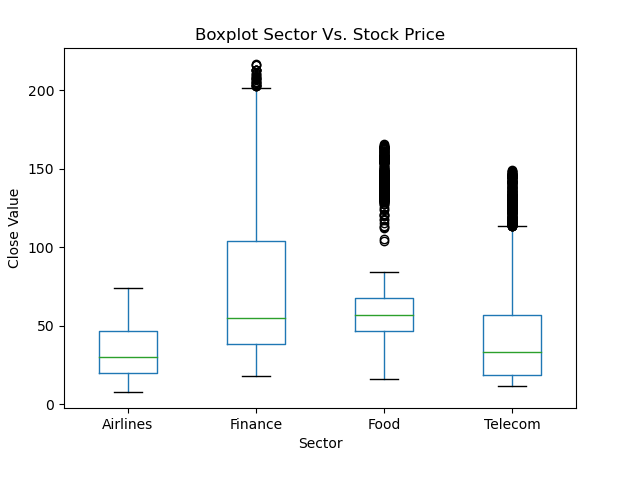

In [16]:
import scipy.stats as st
import numpy as np

ax1 = overall_stock_covid_period_df.boxplot(by ='sector', column =['Close'], grid = False,ylabel="Close Value",xlabel="Sector")
plt.title( 'Boxplot Sector Vs. Stock Price' )
plt.suptitle('') 
plt.show()

Ananlysis : From above box plot , it is clearly idicated that Food and Finance Sectir were positively impacted during Covid Time

In [17]:
overall_stock_covid_period_df["stock_price_change_percentage"] = ((overall_stock_covid_period_df["Close"] - overall_stock_covid_period_df["Open"])/overall_stock_covid_period_df["Open"]) * 100

overall_stock_covid_period_df_sorted =overall_stock_covid_period_df.sort_values("stock_price_change_percentage", ascending=False)[:10]
overall_stock_covid_period_df_sorted

C:\Users\RMaji\AppData\Local\Temp\ipykernel_18548\1559261072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_stock_covid_period_df["stock_price_change_percentage"] = ((overall_stock_covid_period_df["Close"] - overall_stock_covid_period_df["Open"])/overall_stock_covid_period_df["Open"]) * 100


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume,year,stock_price_change_percentage
16797,AAL,Airlines,2020-06-04,12.850000,18.180000,12.630000,16.719999,16.719999,399432600,NaN,30.116722
16741,AAL,Airlines,2020-03-16,12.410000,16.200001,12.000000,15.920000,15.920000,84916800,NaN,28.283644
11716,TSN,Food,2020-03-19,44.000000,57.299999,42.680000,54.209999,49.835957,6611100,NaN,23.204543
20678,HA,Airlines,2020-11-09,17.469999,22.440001,17.120001,20.889999,20.889999,8203500,NaN,19.576418
10459,CARG,Food,2020-03-19,14.360000,17.639999,14.290000,16.860001,16.860001,2980700,NaN,17.409478
20666,HA,Airlines,2020-10-22,14.070000,16.510000,14.000000,16.400000,16.400000,3018200,NaN,16.560057
16747,AAL,Airlines,2020-03-24,11.960000,14.810000,11.540000,13.920000,13.920000,101553100,NaN,16.387960
21832,SAVE,Airlines,2020-06-15,17.040001,20.330000,16.850000,19.730000,18.959246,45681900,NaN,15.786376
21824,SAVE,Airlines,2020-06-03,14.990000,17.520000,14.800000,17.309999,16.633783,61737400,NaN,15.476983
20542,HA,Airlines,2020-04-28,11.830000,13.630000,11.800000,13.600000,13.600000,1783000,NaN,14.961965


From above data shows maximum Stock Price Change(Positive) for a day - It seems Airline and Food Companies had maximum positive changes. But if we notice more closely, Airline company picked up a bit later after covid starts.It picked up from June , 2020.  

In [18]:
overall_stock_covid_period_df_sorted =overall_stock_covid_period_df.sort_values("stock_price_change_percentage", ascending=True)[:10]
overall_stock_covid_period_df_sorted


,stock_name,sector,Date,Open,High,Low,Close,Adj Close,Volume,year,stock_price_change_percentage
18000,UAL,Airlines,2020-03-18,28.809999,28.969999,17.799999,21.379999,21.379999,35372700,NaN,-25.789658
21767,SAVE,Airlines,2020-03-12,18.209999,18.620001,14.000000,14.060000,13.510745,8133300,NaN,-22.789670
20514,HA,Airlines,2020-03-18,11.060000,11.470000,7.550000,8.960000,8.960000,2026200,NaN,-18.987345
16743,AAL,Airlines,2020-03-18,14.240000,14.280000,10.170000,11.650000,11.650000,78458800,NaN,-18.188204
21771,SAVE,Airlines,2020-03-18,10.960000,11.000000,7.440000,9.010000,8.658024,6283400,NaN,-17.791969
17999,UAL,Airlines,2020-03-17,36.490002,38.139999,30.049999,30.670000,30.670000,21078900,NaN,-15.949579
19257,ALK,Airlines,2020-03-18,29.530001,30.040001,20.020000,25.129999,25.129999,5067400,NaN,-14.900106
20510,HA,Airlines,2020-03-12,14.260000,14.310000,12.250000,12.260000,12.260000,2096600,NaN,-14.025245
21762,SAVE,Airlines,2020-03-05,25.020000,25.040001,21.270000,21.540001,20.698538,6721400,NaN,-13.908871
20569,HA,Airlines,2020-06-05,22.350000,22.350000,18.709999,19.360001,19.360001,3837900,NaN,-13.378075


From above data shows maximum Stock Price Change(Minimum) for a day - It seems Airline hitted badly when Covid just started.  